## Solutions

<p style="padding: 10px 10px 30px 10px; border: 2px solid red;">
<b>Box 1.4: Exercise</b>
Are the nodes with the highest centralities same? In the network, plot the nodes with highest centralities.
</p>

In [1]:
# Upload python modules
import numpy as np
import networkx as nx
import powerlaw

# Import python modules for visualizations
import matplotlib.pylab as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Reading the edgelist from STRING
import pandas as pd
edge_list = pd.read_table("Data/STRING_network.tsv")

# Creating network from edge list 
import networkx as nx
STRING_PPI = nx.from_pandas_edgelist(df = edge_list,
                            source = "node1", 
                            target = "node2",
                            edge_attr = "combined_score")
STRING_PPI_pos = nx.spring_layout(STRING_PPI, seed = 20)
# nx.draw(STRING_PPI, with_labels = True, pos = STRING_PPI_pos, node_size = 1000, node_color = "#1BB3F5")

In [3]:
# Calculate the centralities
degree_centrality = nx.degree_centrality(STRING_PPI)
degree_centrality = {key : round(degree_centrality[key], 2) for key in degree_centrality}

betweenness_centrality = nx.betweenness_centrality(STRING_PPI)
betweenness_centrality = {key : round(betweenness_centrality[key], 2) for key in betweenness_centrality}

closeness_centrality = nx.closeness_centrality(STRING_PPI)
closeness_centrality = {key : round(closeness_centrality[key], 2) for key in closeness_centrality}

eccentricity_centrality = nx.eccentricity(STRING_PPI)

centrality_table = pd.DataFrame({"Degree centrality" : pd.Series(degree_centrality),
                                    "Betweenness" : pd.Series(betweenness_centrality),
                                    "Closeness centrality" : pd.Series(closeness_centrality),
                                    "Eccentricity" : pd.Series(eccentricity_centrality)})

In [4]:
# Print top genes by centrality
top_degree = list(centrality_table.sort_values(by = "Degree centrality", ascending = False)[0:1].index)
top_betweenness = list(centrality_table.sort_values(by = "Betweenness", ascending = False)[0:1].index)
top_closeness = list(centrality_table.sort_values(by = "Closeness centrality", ascending = False)[0:1].index)
top_eccentricity = list(centrality_table.sort_values(by = "Eccentricity", ascending = False)[0:1].index)
print(top_degree)
print(top_betweenness)
print(top_closeness)
print(top_eccentricity)

['SOCS3']
['AR']
['HSP90AA1']
['FOXA1']


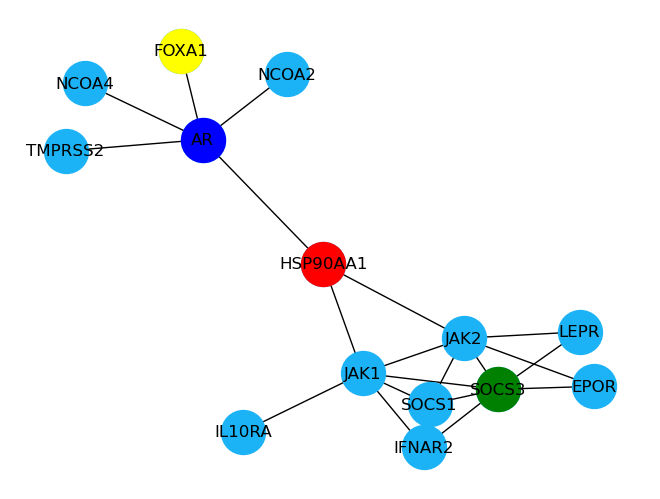

In [5]:
nx.draw(STRING_PPI, with_labels = True, pos = STRING_PPI_pos, node_size = 1000, node_color = "#1BB3F5")
nx.draw_networkx_nodes(STRING_PPI, STRING_PPI_pos, nodelist = top_degree, node_size = 1000, node_color = "green")
nx.draw_networkx_nodes(STRING_PPI, STRING_PPI_pos, nodelist = top_betweenness, node_size = 1000, node_color = "blue")
nx.draw_networkx_nodes(STRING_PPI, STRING_PPI_pos, nodelist = top_closeness, node_size = 1000, node_color = "red")
nx.draw_networkx_nodes(STRING_PPI, STRING_PPI_pos, nodelist = top_eccentricity, node_size = 1000, node_color = "yellow")
plt.show()

### Exercise session 1

#### Part A: Basic network properties
- Load the network in Data/Human_drug_target_net.csv
- Retrieve the basic properties of the network like number of nodes, edges, density, diameter, radius, etc
- How many connected components are there in the network?
- Is the network modular?
- Plot the degree distribution? Is the network a scale free network?

Note: Instead of using the entire network, you may use the largest connected component.


In [6]:
# Upload Python modules
import networkx as nx
import pandas as pd
import numpy as np
import powerlaw
import matplotlib.pylab as plt
import seaborn as sns

%matplotlib inline

In [7]:
# Reading the network
edge_list = pd.read_csv("Data/Human_drug_target_net.csv")
edge_list.shape

(7972, 3)

683 3986


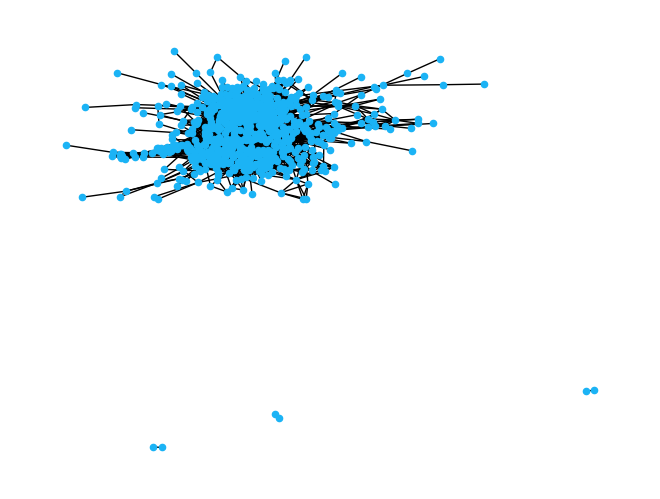

In [8]:
# Creating network from edge list 
STRING_net = nx.from_pandas_edgelist(df = edge_list,
                                        source = "from_geneSymbol", 
                                        target = "to_geneSymbol",
                                        edge_attr = "combined_score")
STRING_net_pos = nx.spring_layout(STRING_net, seed = 123)
print(len(STRING_net.nodes()), len(STRING_net.edges()))
nx.draw(STRING_net, with_labels = False, pos = STRING_net_pos, node_size = 20, node_color = "#1BB3F5")

In [9]:
# Get basic properties of the network
print("Number of nodes:", STRING_net.number_of_nodes())
print("Number of edges:", STRING_net.number_of_edges())
print("Number of connected components:", nx.number_connected_components(STRING_net))
print("Network modularity:", nx.algorithms.community.modularity(STRING_net, nx.connected_components(STRING_net)))
print("Number of isolated nodes:", nx.number_of_isolates(STRING_net))
print("Number of self loops:", nx.number_of_selfloops(STRING_net))

Number of nodes: 683
Number of edges: 3986
Number of connected components: 4
Network modularity: 0.0015045131618466553
Number of isolated nodes: 0
Number of self loops: 0


In [10]:
# Extract the largest connected component
STRING_net = list(STRING_net.subgraph(c).copy() for c in sorted(nx.connected_components(STRING_net), key = len, reverse = True))[0]
print(len(STRING_net.nodes()), len(STRING_net.edges()))
# nx.draw(STRING_net, with_labels = True, node_size = 1000, node_color = "#1BB3F5")


677 3983


In [11]:
# Get basic properties of the network
print("Number of nodes:", STRING_net.number_of_nodes())
print("Number of edges:", STRING_net.number_of_edges())
print("Number of connected components:", nx.number_connected_components(STRING_net))
print("Network modularity:", nx.algorithms.community.modularity(STRING_net, nx.connected_components(STRING_net)))
print("Number of isolated nodes:", nx.number_of_isolates(STRING_net))
print("Number of self loops:", nx.number_of_selfloops(STRING_net))
print("Diameter of network:", nx.diameter(STRING_net))
print("Average clustering coefficient:", nx.average_clustering(STRING_net))
print("Average shortest path length:", nx.average_shortest_path_length(STRING_net))
print("Network density:", nx.density(STRING_net))

Number of nodes: 677
Number of edges: 3983
Number of connected components: 1
Network modularity: 0.0
Number of isolated nodes: 0
Number of self loops: 0
Diameter of network: 10
Average clustering coefficient: 0.37943512544002284
Average shortest path length: 3.5286025189445254
Network density: 0.01740623880153479


In [12]:
# Find the top five nodes with highest centralities [takes long time]
degree_centrality = nx.degree_centrality(STRING_net)
betweenness_centrality = nx.betweenness_centrality(STRING_net)
closeness_centrality = nx.closeness_centrality(STRING_net)

centrality_table = pd.DataFrame({"Degree centrality" : pd.Series(degree_centrality),
                                    "Betweenness" : pd.Series(betweenness_centrality),
                                    "Closeness centrality" : pd.Series(closeness_centrality)})

print(centrality_table.sort_values(by = "Degree centrality", ascending = False)[0:5].index.values)
print(centrality_table.sort_values(by = "Betweenness", ascending = False)[0:5].index.values)
print(centrality_table.sort_values(by = "Closeness centrality", ascending = False)[0:5].index.values)


['SRC' 'TP53' 'AKT1' 'ALB' 'PIK3R1']
['TP53' 'SRC' 'ALB' 'GAPDH' 'SNCA']
['ALB' 'SRC' 'GAPDH' 'TP53' 'AKT1']


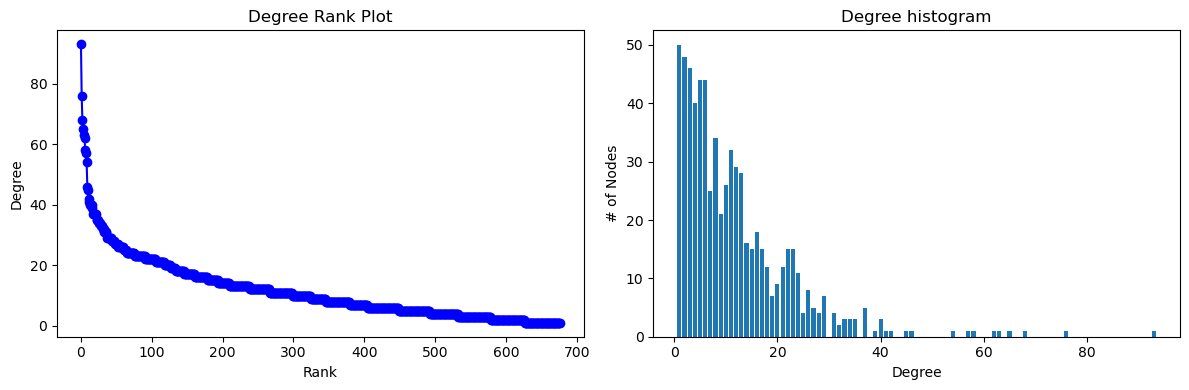

In [13]:
# Plot degree distribution
degree_sequence = sorted((d for n, d in STRING_net.degree()), reverse=True)
dmax = max(degree_sequence)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.plot(degree_sequence, "b-", marker="o")
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()

/research/work/aghosh/Tools/Conda/miniconda3/envs/interactome/lib/python3.9/site-packages/powerlaw.py:699: RuntimeWarning: invalid value encountered in divide
  (CDF_diff**2) /
/research/work/aghosh/Tools/Conda/miniconda3/envs/interactome/lib/python3.9/site-packages/powerlaw.py:699: RuntimeWarning: invalid value encountered in divide
  (CDF_diff**2) /


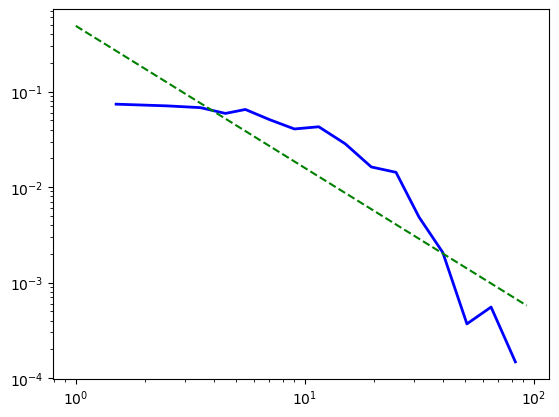

Value of alpha: 1.4879299890223088


In [14]:
# Fit power law
degree_sequence = sorted([d for n, d in STRING_net.degree()], reverse=True) # used for degree distribution and powerlaw test

fit = powerlaw.Fit(degree_sequence, xmin=1) 

fig2 = fit.plot_pdf(color='b', linewidth=2)
fit.power_law.plot_pdf(color='g', linestyle='--', ax=fig2)
plt.show()
print("Value of alpha:", fit.power_law.alpha)


#### Part B: Network data mining
Drug repurposing involves the use approved drugs for new diseases. This is usually done by identifying drugs that are known to directly target the known disease genes or those that are in the same biological pathway. Network biology can particularly aid the process by providing a holistic view of the interactions between the disease genes and the genes targeted by approved drugs. Network data mining algorithms can then be used to identify potential drugs for the disease. Let us consider the case of SARS-Cov-2 infection. SARS-Cov-2 infection requires binding of the virus spike protein to human ACE2 protein and priming of the spike protein by TMPRSS2. Thus, ACE2 has been suggested to be a potential target for developing drugs against SARS-Cov-2. Assuming that all the approved drugs are listed in Drugs.csv identify which of them could be used for the treatment of SARS-Cov-2.

Hint: The drugs that target ACE2 or genes closest to ACE2 can be considered potential drugs for SARS-Cov-2.


<strong>Files to use:</strong>
- Network: Data/Human_drug_target_net.csv
- Drugs: Data/Drugs.csv

In [15]:
# Upload python modules
import networkx as nx
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

%matplotlib inline

683 3986


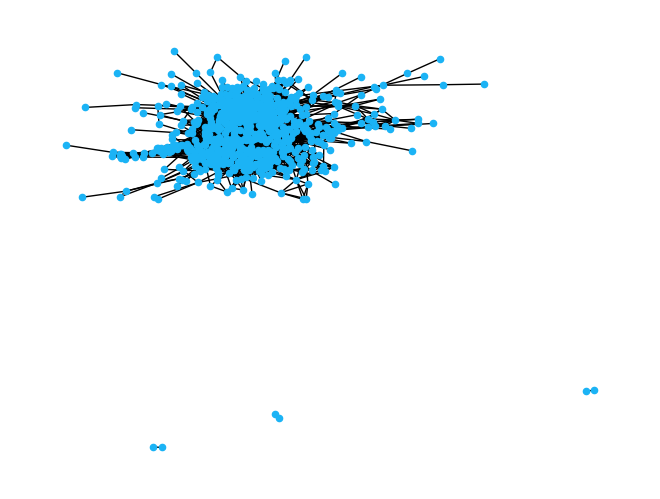

In [16]:
# Reading network
edge_list = pd.read_csv("Data/Human_drug_target_net.csv")

# Creating network from edge list 
STRING_net = nx.from_pandas_edgelist(df = edge_list,
                                        source = "from_geneSymbol", 
                                        target = "to_geneSymbol",
                                        edge_attr = "combined_score")
STRING_net_pos = nx.spring_layout(STRING_net, seed = 123)
print(len(STRING_net.nodes()), len(STRING_net.edges()))
nx.draw(STRING_net, with_labels = False, pos = STRING_net_pos, node_size = 20, node_color = "#1BB3F5")

677 3983


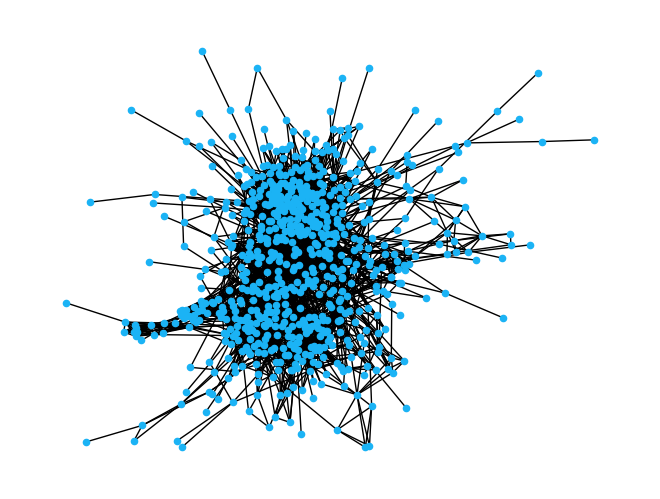

In [17]:
# Remove self-loops
STRING_net.remove_edges_from(nx.selfloop_edges(STRING_net))

# Extract the largest connected component
STRING_net = list(STRING_net.subgraph(c).copy() for c in sorted(nx.connected_components(STRING_net), key = len, reverse = True))[0]
print(len(STRING_net.nodes()), len(STRING_net.edges()))
nx.draw(STRING_net, pos = STRING_net_pos, node_size = 20, node_color = "#1BB3F5")


In [18]:
# Read the drugs file
drugs = pd.read_csv("Data/Drugs.csv")
drugs["shortest_path"] = pd.Series(dtype = "str")
drugs["shortest_path_length"] = pd.Series(dtype = "int")
drugs

,drug_id,drug_name,drug_target,drug_target_name,shortest_path,shortest_path_length
0,DB00432,Trifluridine,TYMS,Thymidylate synthase,NaN,NaN
1,DB00503,Ritonavir,NR1I2,Nuclear receptor subfamily 1 group I member 2,NaN,NaN
2,DB00518,Albendazole,TUBA1A,Tubulin alpha-1A chain,NaN,NaN
3,DB00643,Mebendazole,TUBA1A,Tubulin alpha-1A chain,NaN,NaN
4,DB00711,Diethylcarbamazine,PTGS1,Prostaglandin G/H synthase 1,NaN,NaN
5,DB00811,Ribavirin,IMPDH2,Inosine-5'-monophosphate dehydrogenase 2,NaN,NaN
6,DB00848,Levamisole,ALPPL2,"Alkaline phosphatase, placental-like",NaN,NaN
7,DB00908,Quinidine,KCNH2,Potassium voltage-gated channel subfamily H me...,NaN,NaN
8,DB01131,Proguanil,DHFR,Dihydrofolate reductase,NaN,NaN
9,DB01157,Trimetrexate,DHFR,Dihydrofolate reductase,NaN,NaN


In [19]:
# Calculate the shortest path from ACE2 to the drug targets
for i, row in drugs.iterrows():
    shortest_path = nx.shortest_path(STRING_net, source = "ACE2", target = row["drug_target"])
    drugs.loc[i, "shortest_path"] = "; ".join(shortest_path)
    drugs.loc[i, "shortest_path_length"] = len(shortest_path) - 1

drugs.sort_values("shortest_path_length")

,drug_id,drug_name,drug_target,drug_target_name,shortest_path,shortest_path_length
14,DB05521,Telaprevir,SLCO2B1,Solute carrier organic anion transporter famil...,ACE2; SLC15A1; SLCO2B1,2.0
13,DB04835,Maraviroc,CCR5,C-C chemokine receptor type 5,ACE2; EDN1; CCR5,2.0
17,DB11156,Pyrantel,CHRM1,Muscarinic acetylcholine receptor M1,ACE2; EDN1; CHRM1,2.0
0,DB00432,Trifluridine,TYMS,Thymidylate synthase,ACE2; ALB; NT5E; TYMS,3.0
16,DB08864,Rilpivirine,NR1I2,Nuclear receptor subfamily 1 group I member 2,ACE2; ALB; SRC; NR1I2,3.0
15,DB05630,Sodium stibogluconate,TOP1,DNA topoisomerase 1,ACE2; ALB; TP53; TOP1,3.0
12,DB01611,Hydroxychloroquine,TLR9,Toll-like receptor 9,ACE2; ALB; CD4; TLR9,3.0
10,DB01179,Podofilox,TOP2A,DNA topoisomerase 2-alpha,ACE2; ALB; CTNNB1; TOP2A,3.0
9,DB01157,Trimetrexate,DHFR,Dihydrofolate reductase,ACE2; ALB; TP53; DHFR,3.0
6,DB00848,Levamisole,ALPPL2,"Alkaline phosphatase, placental-like",ACE2; ALB; GOT1; ALPPL2,3.0


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=567e54c1-8e1f-4560-8621-8b304ec1f642' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>